In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## First look at data

In [4]:
customers = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Check for null values**

In [6]:
customers.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
customers['TotalCharges'] = customers['TotalCharges'].replace(" ", 0).astype('float32')

In [8]:
for column in customers.select_dtypes('object').columns:
    if customers[column].nunique() == 3:
        print(column, customers[column].unique())

MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']


## EDA

#### Churn

We have imbalanced classes

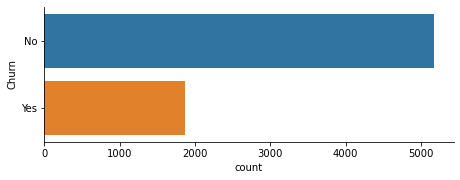

In [9]:
ax = sns.catplot(y="Churn", kind="count", data=customers, height=2.6, aspect=2.5, orient='h')

#### KDE of numerical features

From plots we can see that:
- new clients churn more
- clients who have high monthly charges - churn more

- tenure and MonthlyCharges are probably imbortant features

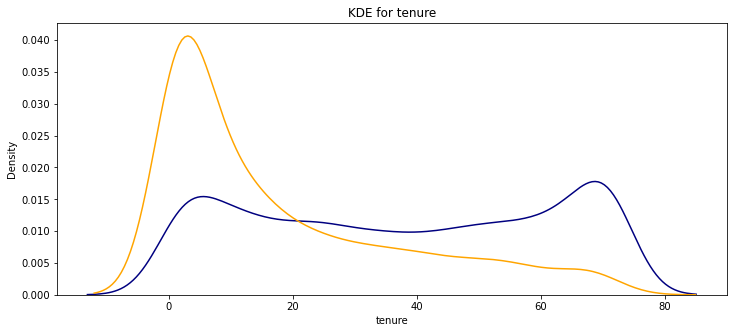

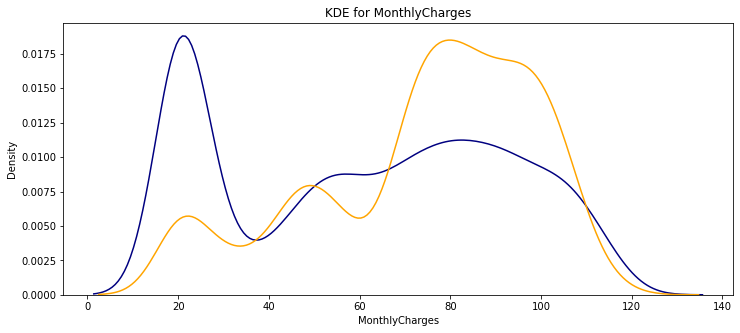

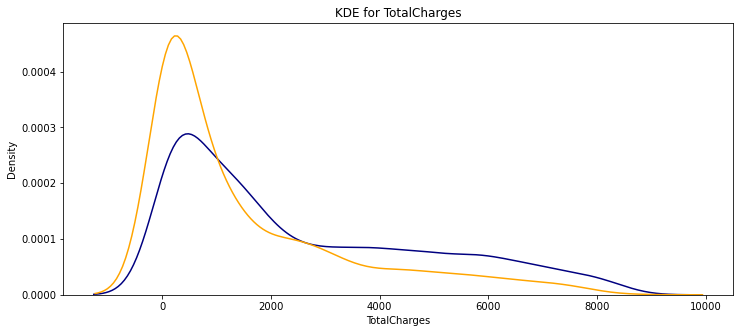

In [10]:
def kdeplot(feature):
    plt.figure(figsize=(12,5))
    ax0 = sns.kdeplot(customers[customers.Churn == "No"][feature].dropna(), color='navy', label="Churn: No")
    ax1 = sns.kdeplot(customers[customers.Churn == "Yes"][feature].dropna(), color='orange', label="Churn: Yes")
    plt.title(f"KDE for {feature}")
    
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

We can see some pattern on this scatterplots: 

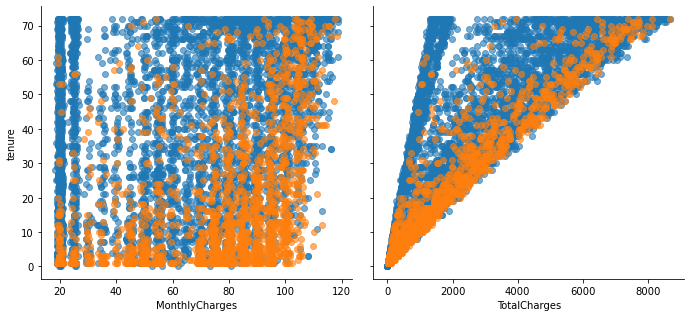

In [11]:
g = sns.PairGrid(customers, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"], height=4.5, hue="Churn", aspect=1.1)
ax = g.map(plt.scatter, alpha=0.6)

### Cat features

This dataset has 16 categorical features:

- Six binary features (Yes/No)
- Nine features with three unique values each (categories)
- One feature with four unique values


In [12]:
cat_col = [column for column in customers.select_dtypes("object").columns if customers[column].nunique() < 10]
cat_col = cat_col[:-1]

In [13]:
cat_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

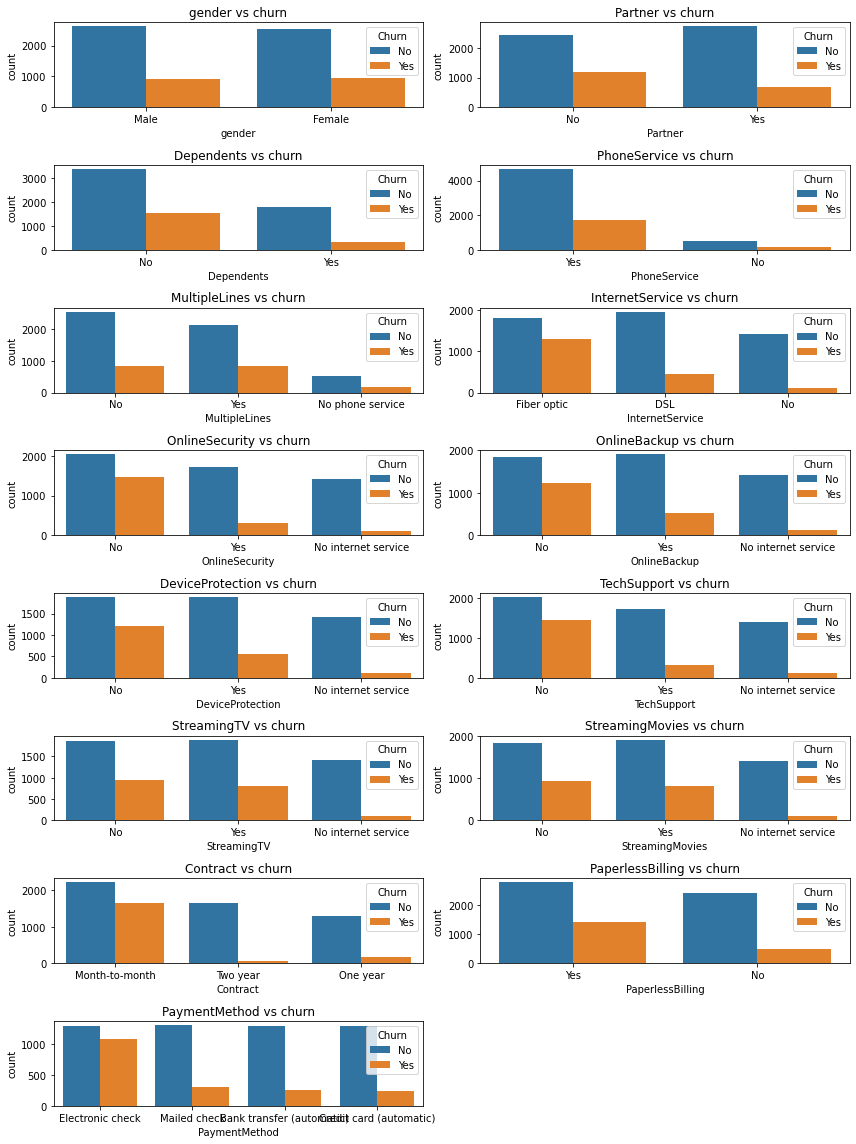

In [14]:
plt.figure(figsize=(12,16))
for i, column in enumerate(cat_col):
    plt.subplot(np.ceil(len(cat_col) / 2), 2, i+1)
    sns.countplot(customers[column], hue=customers.Churn,
                 order = customers[column].value_counts().index)
    plt.title(f"{column} vs churn")
    plt.xlabel(f"{column}")


plt.tight_layout()
plt.show()

#### Gender and age

- Gender is not an indicative of churn.
- SeniorCitizens are only 16% of customers, but they have a much higher churn rate: 42% against 23% for non-senior customers.
- There are no special relations between this categorical values and the main numerical features.



[]

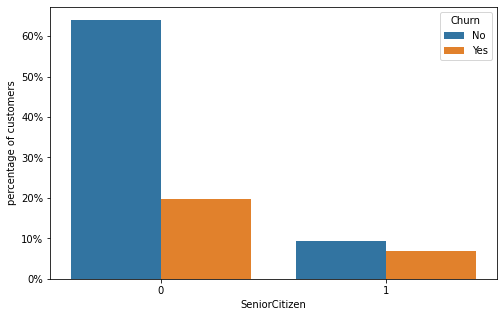

In [15]:
plt.figure(figsize=(8,5))
axis_name = "percentage of customers"
g = customers.groupby('SeniorCitizen')['Churn'].value_counts().to_frame()
g = g.rename({"Churn": axis_name},axis=1).reset_index()
g[axis_name] = g[axis_name]/customers.shape[0]
ax = sns.barplot(x="SeniorCitizen", y=axis_name, hue='Churn', data=g, orient='v')
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
ax.plot()

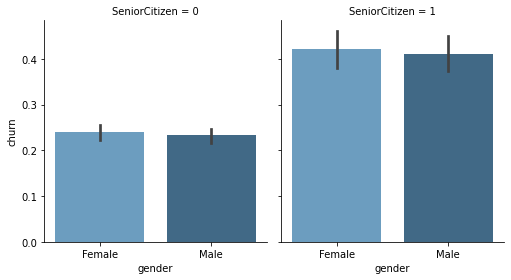

In [16]:
customers['churn'] = customers['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(customers, col="SeniorCitizen", height=4, aspect=.9)
ax = g.map(sns.barplot, "gender", "churn", palette = "Blues_d", order= ['Female', 'Male'])

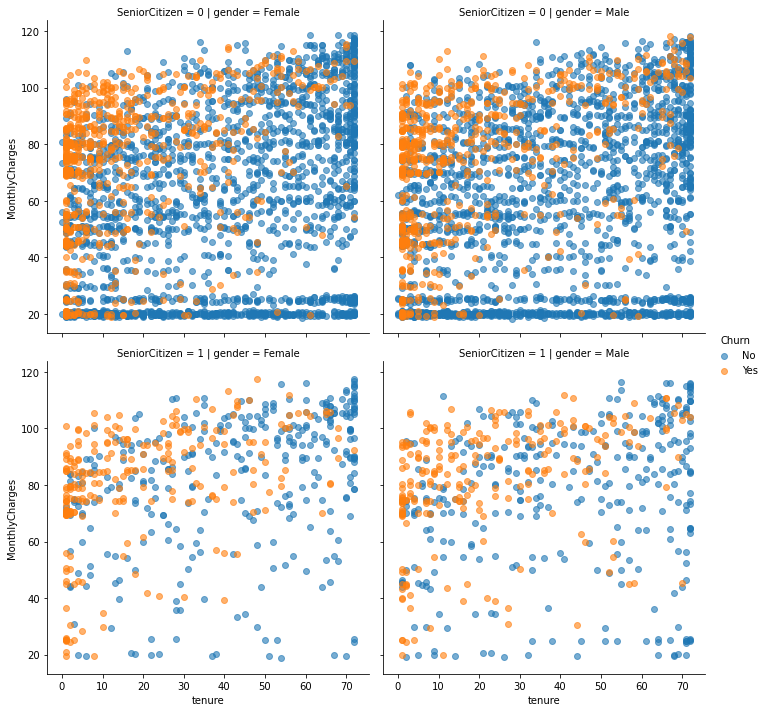

In [17]:
g = sns.FacetGrid(customers, row='SeniorCitizen', col="gender", hue="Churn", height=5)
g.map(plt.scatter, "tenure", "MonthlyCharges", alpha=0.6)
g.add_legend();


#### Partner and dependents

- Customers that doesn't have partners are more likely to churn
- Customers without dependents are also more likely to churn


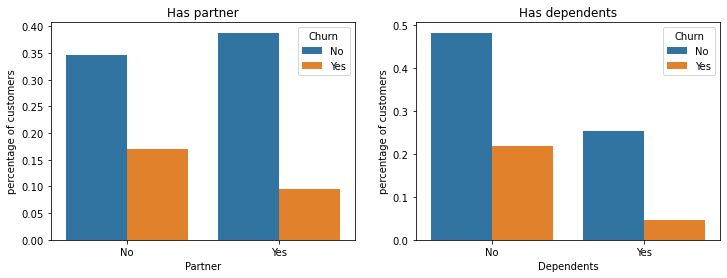

In [18]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"

# partner plot
partner = customers.groupby("Partner")['Churn'].value_counts()/customers.shape[0]
partner = partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(data=partner, x='Partner', y=axis_y, hue='Churn', ax=axis[0])

# dependents plot
dependents = customers.groupby("Dependents")['Churn'].value_counts()/customers.shape[0]
dependents = dependents.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(data=dependents, x='Dependents', y=axis_y, hue='Churn', ax=axis[1])

#### Phone and Internet services

- Few customers doesn't have phone service
- Customers with multiple lines and no have almost the same churn rate


[]

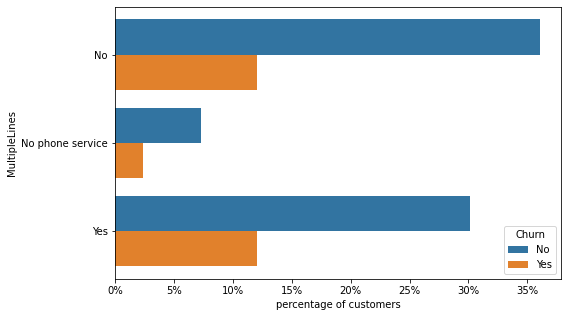

In [19]:
plt.figure(figsize=(8,5))
axis_name = "percentage of customers"
g = customers.groupby('MultipleLines')['Churn'].value_counts().to_frame()
g = g.rename({"Churn": axis_name},axis=1).reset_index()
g[axis_name] = g[axis_name]/customers.shape[0]
ax = sns.barplot(x= axis_name, y="MultipleLines", hue='Churn', data=g, orient='h')
ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
ax.plot()

Let's see how multiple lines affects the monthly charges:

- customers who have multiple lines and high monthlyCharges are more probably to churn 

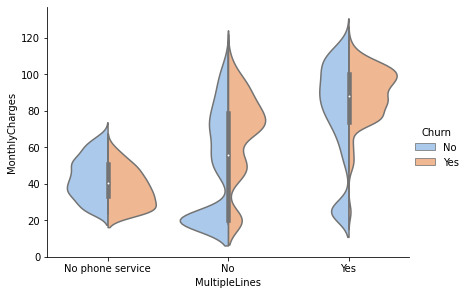

In [20]:
ax = sns.catplot(x="MultipleLines", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=customers, height=4.2, aspect=1.4)

#### Internet services

- customes with no internet have a very low churn rate
- customers with biber are more probably to churn 

[]

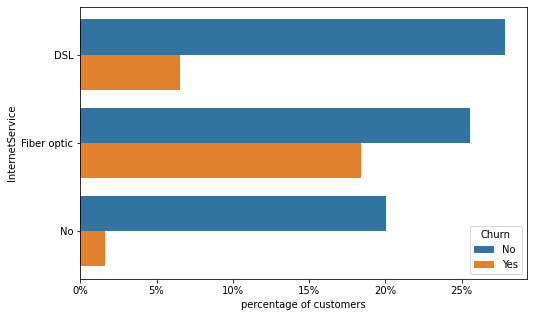

In [21]:
plt.figure(figsize=(8,5))
axis_name = "percentage of customers"
g = customers.groupby('InternetService')['Churn'].value_counts().to_frame()
g = g.rename({"Churn": axis_name},axis=1).reset_index()
g[axis_name] = g[axis_name]/customers.shape[0]
ax = sns.barplot(x= axis_name, y="InternetService", hue='Churn', data=g, orient='h')
ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
ax.plot()

Comparing the Internet service with monthly charges:

- customers with DLS and higher charges are less probable to churn

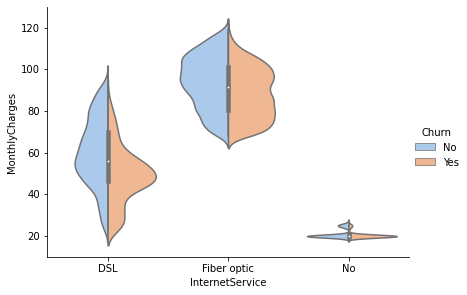

In [22]:
ax = sns.catplot(x="InternetService", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=customers, height=4.2, aspect=1.4)

#### Additional services

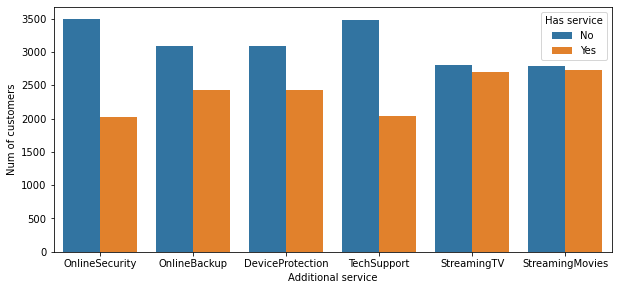

In [23]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(customers[customers["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

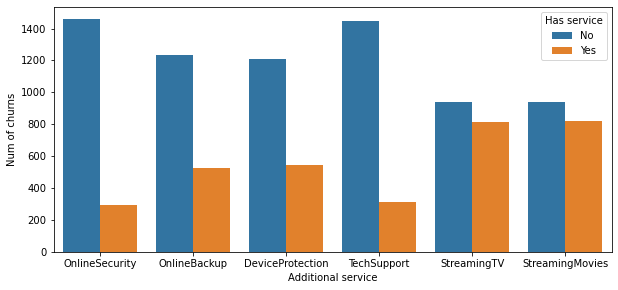

In [24]:
plt.figure(figsize=(10, 4.5))
df1 = customers[(customers.InternetService != "No") & (customers.Churn == "Yes")]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()





The first plot shows the total number of customers for each additional service, while the second shows the number of clients that churn. We can see that:

- Customers with the first 4 additionals (security to tech support) are more unlikely to churn
- Streaming service is not predictive for churn



#### Contract and Payment


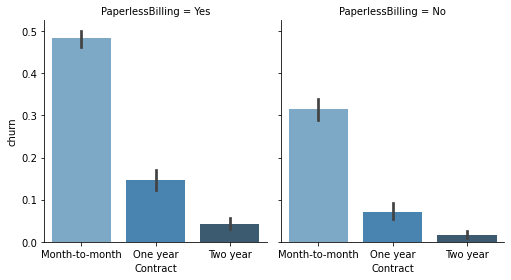

In [25]:
g = sns.FacetGrid(customers, col="PaperlessBilling", height=4, aspect=.9)
ax = g.map(sns.barplot, "Contract", "churn", palette = "Blues_d", order= ['Month-to-month', 'One year', 'Two year'])

[]

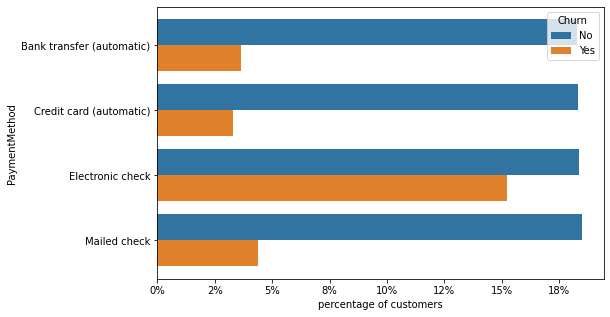

In [26]:
plt.figure(figsize=(8,5))
axis_name = "percentage of customers"
g = customers.groupby('PaymentMethod')['Churn'].value_counts().to_frame()
g = g.rename({"Churn": axis_name},axis=1).reset_index()
g[axis_name] = g[axis_name]/customers.shape[0]
ax = sns.barplot(x= axis_name, y="PaymentMethod", hue='Churn', data=g, orient='h')
ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
ax.plot()

A few observations:

- Customers with paperless billing are more probable to churn
- The preferred payment method is Electronic check with around 35% of customers. This method also has a very high churn rate
- Short term contracts have higher churn rates


#### relation with numerical features:

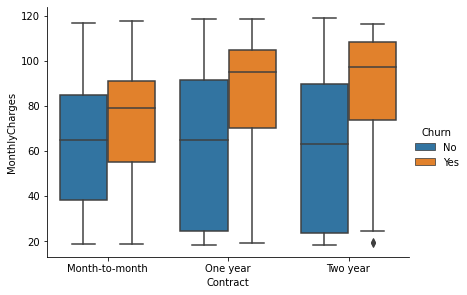

In [27]:
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=customers, height=4.2, aspect=1.4)

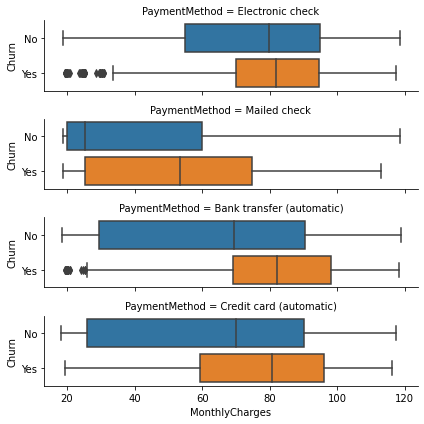

In [28]:
ax = sns.catplot(y="Churn", x="MonthlyCharges", row="PaymentMethod", kind="box", data=customers, height=1.5, aspect=4,)

- Longer contracts are more affected by higher monthly charges (for churn rate).
- Mailed checks have lower charges
- There is a huge gap in charges between customers that churn and those that don't with respect to Mailed Check



In [29]:
## dropping customers where tenure = 0
customers.drop(customers[customers['tenure']==0].index,inplace=True)

### Checking for outliers

Detecting outliers with iqr-method

In [31]:
def iqr_outliers(df):
    out=[]
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    return out

for column in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    print(f"{column} outliers : {iqr_outliers(customers[column])}")

tenure outliers : []
MonthlyCharges outliers : []
TotalCharges outliers : []


### Correlation between features

- multipleLines correlated with Phone Service
- 6 additional services are correlated between each other

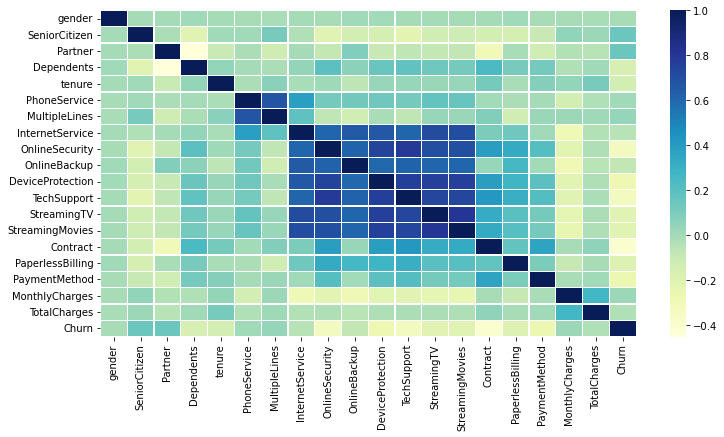

In [32]:
plt.figure(figsize=(12, 6))
customers.drop(['customerID', 'churn'],
        axis=1, inplace=True)
corr = customers.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

#### Fixin corrrelation

In [33]:
cat_col = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies']
for column in cat_col:
    print(column)
    print(customers[column].unique())

MultipleLines
['No phone service' 'No' 'Yes']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']


In [34]:
customers['MultipleLines'][customers.MultipleLines == "No phone service"] = "No"

for column in cat_col[1:]:
    customers[column][customers[column] == "No internet service"] = "No"

In [35]:
for column in cat_col:
    print(column)
    print(customers[column].unique())

MultipleLines
['No' 'Yes']
OnlineSecurity
['No' 'Yes']
OnlineBackup
['Yes' 'No']
DeviceProtection
['No' 'Yes']
TechSupport
['No' 'Yes']
StreamingTV
['No' 'Yes']
StreamingMovies
['No' 'Yes']


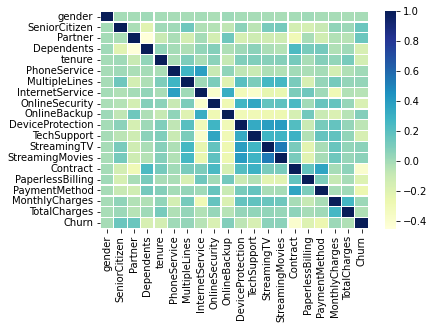

In [36]:
corr = customers.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

### Feature Importance

In [37]:
from sklearn.ensemble import RandomForestClassifier

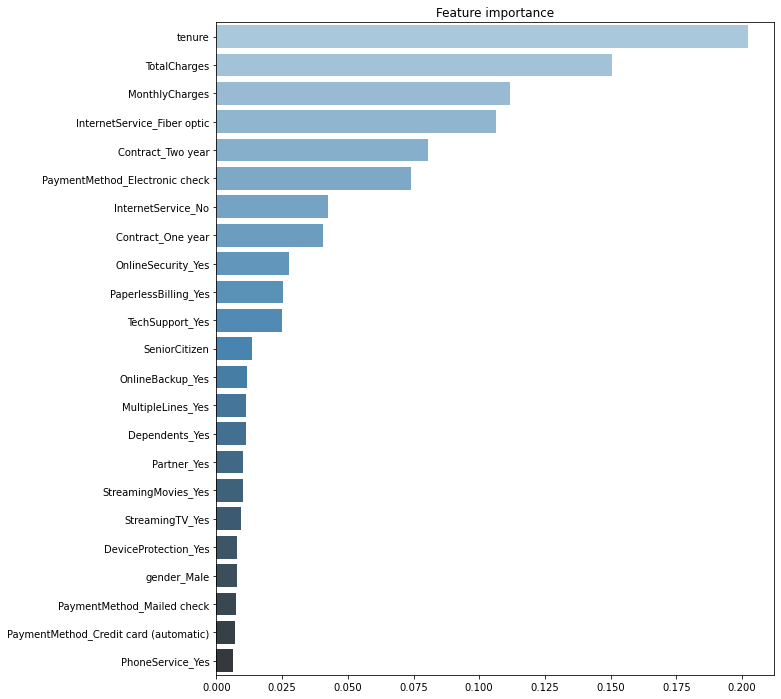

In [38]:
params = {'random_state': 0, 'n_jobs': -1, 'n_estimators': 5000, 'max_depth': 8}
df = pd.get_dummies(customers, drop_first=True)

x, y = df.drop("Churn_Yes",axis=1), df['Churn_Yes']

clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

## Modeling

### Splitting data

In [39]:
from sklearn.model_selection import train_test_split
customers = pd.get_dummies(customers, drop_first=True)

In [40]:
customers = customers.rename({"Churn_Yes": "churn"}, axis=1)
X, y = customers.drop('churn', axis=1), customers.churn

In [41]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=.1, shuffle=True, random_state=47)

#### Baseline testing

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,plot_confusion_matrix

**Logistic regression without feature scaling**

In [41]:
estimator = LogisticRegression()
estimator.fit(X_train, y_train)
pred = estimator.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       497
           1       0.71      0.57      0.63       207

    accuracy                           0.81       704
   macro avg       0.77      0.74      0.75       704
weighted avg       0.80      0.81      0.80       704



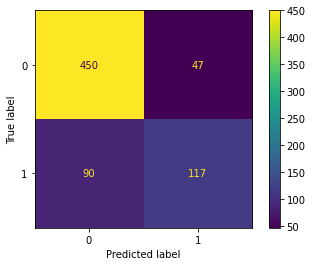

In [42]:
plot_confusion_matrix(estimator, X_test, y_test)
plt.show()

**Logistic regression with feature scaling**

In [43]:
from sklearn.preprocessing import MinMaxScaler
X_scaled = X.copy()
min_max = MinMaxScaler()
X_scaled = min_max.fit_transform(X_scaled)
X_train_scaled, X_test_scaled,y_train_scaled, y_test_scaled = train_test_split(X_scaled,y, test_size=.1, shuffle=True, random_state=47)

In [44]:
estimator = LogisticRegression()
estimator.fit(X_train_scaled, y_train_scaled)
pred = estimator.predict(X_test_scaled)
print(classification_report(y_test_scaled, pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       497
           1       0.71      0.56      0.62       207

    accuracy                           0.80       704
   macro avg       0.77      0.73      0.74       704
weighted avg       0.79      0.80      0.79       704



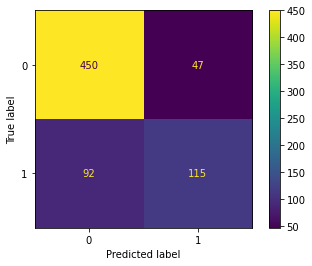

In [45]:
plot_confusion_matrix(estimator, X_test_scaled, y_test_scaled)
plt.show()

**Logistic regression with feature scaling and class balancing**

In [45]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_over, y_over = smote.fit_resample(X_train_scaled,y_train_scaled)


In [46]:
estimator = LogisticRegression()
estimator.fit(X_over, y_over)
pred = estimator.predict(X_test_scaled)
print(classification_report(y_test_scaled, pred))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       497
           1       0.59      0.80      0.68       207

    accuracy                           0.78       704
   macro avg       0.75      0.79      0.76       704
weighted avg       0.81      0.78      0.79       704



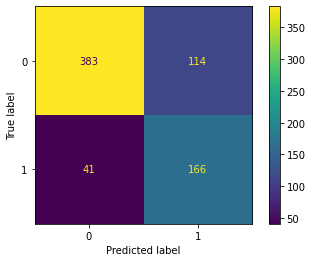

In [47]:
plot_confusion_matrix(estimator, X_test_scaled, y_test_scaled)
plt.show()

**Logistic regression with feature scaling and class balancing(with undersampling)**

In [48]:
from imblearn.over_sampling import ADASYN
smote = SMOTE()
ada = ADASYN(random_state=12,  n_neighbors=7, n_jobs=-1)
X_ada, y_ada = ada.fit_resample(X_train_scaled, y_train_scaled)
X_ada, y_ada = smote.fit_resample(X_ada, y_ada)

In [49]:
estimator = LogisticRegression()
estimator.fit(X_ada, y_ada)
pred = estimator.predict(X_test_scaled)
print(classification_report(y_test_scaled, pred))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81       497
           1       0.56      0.82      0.66       207

    accuracy                           0.75       704
   macro avg       0.73      0.77      0.73       704
weighted avg       0.80      0.75      0.76       704



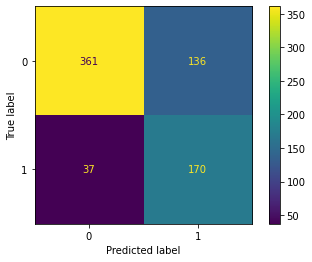

In [50]:
plot_confusion_matrix(estimator, X_test_scaled, y_test_scaled)
plt.show()

In [51]:
X_train , y_train = X_ada, y_ada

Tunning ADASYN

In [53]:
# from tqdm import tqdm_notebook
# res = []
# k_values = range(2,15)

# for k in tqdm_notebook(k_values):
#     ada = ADASYN(random_state=12,  n_neighbors=k, n_jobs=-1)
#     X_ada, y_ada = ada.fit_resample(X_train_scaled, y_train_scaled)
#     estimator = LogisticRegression()
#     estimator.fit(X_ada, y_ada)
#     pred = estimator.predict(X_test_scaled)
#     class_report = classification_report(y_test_scaled, pred)
#     matrix = plot_confusion_matrix(estimator, X_test_scaled, y_test_scaled)
#     res.append([class_report, matrix])

In [54]:
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score,StratifiedKFold, GridSearchCV
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay,  plot_roc_curve

In [55]:


kFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
def test_estimator(estimator, X_test, y_test, name, pr_curve=True):
    """
        function for fast model testing
    """
    pred = estimator.predict(X_test)
    if pr_curve:
        pred_probs = estimator.predict_proba(X_test)[:, 0]
    print("Data for {}".format(name))
    print(classification_report(y_test, pred))
    fig, axis = plt.subplots(1, 3, figsize=(12,4))
    plot_confusion_matrix(estimator, X_test, y_test,ax=axis[0])
    
    if pr_curve:
        precision, recall, _ = precision_recall_curve(y_test, pred_probs)
        PrecisionRecallDisplay(precision,recall).plot(ax=axis[1])
        plot_roc_curve(estimator,X_test,y_test, ax=axis[2])
    else:
        plot_roc_curve(estimator,X_test,y_test, ax=axis[1])
    plt.show()

LIGHTGBM testing

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       497
           1       0.66      0.61      0.63       207

    accuracy                           0.79       704
   macro avg       0.75      0.74      0.75       704
weighted avg       0.79      0.79      0.79       704



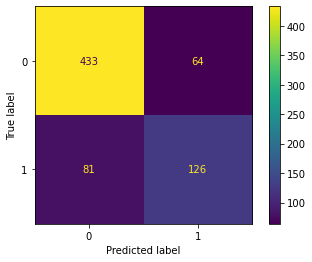

In [54]:

estimator = LGBMClassifier(max_depth=4, n_estimators=1000)
estimator.fit(X_train, y_train)
pred = estimator.predict(X_test_scaled)
print(classification_report(y_test_scaled, pred))
plot_confusion_matrix(estimator, X_test_scaled, y_test_scaled)
plt.show()

SVM testing

Data for SVM
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       497
           1       0.59      0.74      0.66       207

    accuracy                           0.77       704
   macro avg       0.73      0.76      0.74       704
weighted avg       0.79      0.77      0.78       704



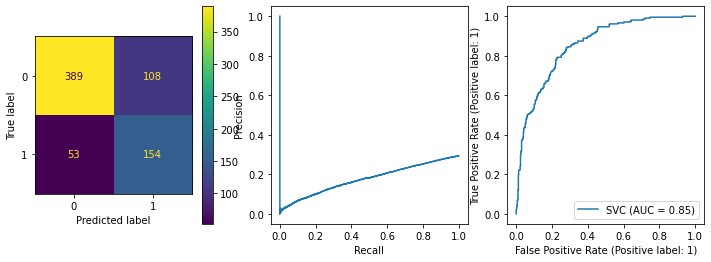

In [86]:
estimator = SVC(probability=True)
estimator.fit(X_train, y_train)
test_estimator(estimator, X_test_scaled, y_test_scaled, "SVM")

Random forest classifier

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       497
           1       0.63      0.76      0.69       207

    accuracy                           0.80       704
   macro avg       0.76      0.79      0.77       704
weighted avg       0.81      0.80      0.80       704



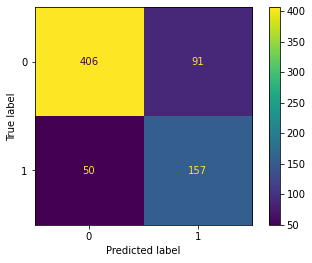

In [55]:
estimator = RandomForestClassifier(max_depth=14,n_estimators=1000, n_jobs=-1, min_samples_split=2)
estimator.fit(X_train, y_train)
pred = estimator.predict(X_test_scaled)
print(classification_report(y_test_scaled, pred))
plot_confusion_matrix(estimator, X_test_scaled, y_test_scaled)
plt.show()

Voting

Data for Voting
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       497
           1       0.64      0.73      0.68       207

    accuracy                           0.80       704
   macro avg       0.76      0.78      0.77       704
weighted avg       0.81      0.80      0.80       704



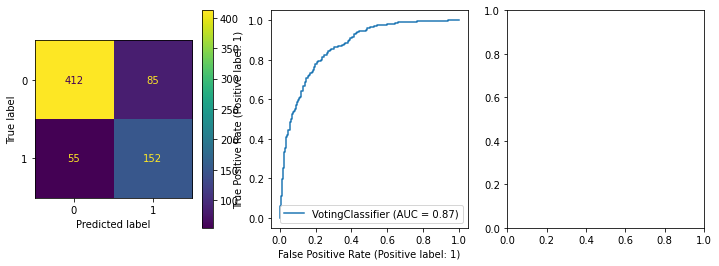

In [103]:

clf1 = SVC(probability=True)
clf2 = LGBMClassifier(max_depth=14,)
clf2 = RFE(clf2, step=8)
clf3 = RandomForestClassifier(max_depth=14,)
clf13 = RFE(clf3, step=8)

estimator = VotingClassifier(estimators=[ ('lgbm', clf2), ('rf', clf3), ('SVM', clf1),], voting='soft', n_jobs=-1)
# estimator = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3],weights=[1,1,1], fit_base_estimators=False,)

estimator.fit(X_train, y_train)
test_estimator(estimator, X_test_scaled, y_test_scaled, "Voting", pr_curve=False)

### Tunning params

#### 1. LGBM tunning

In [121]:
%%time
max_depth = {"max_depth": range(6,15),
            "num_leaves": range(40,51),
            'min_child_samples': range(100,120,10)}


estimator = LGBMClassifier(n_estimators=1000)
lgbm_depth = GridSearchCV(estimator, param_grid=max_depth, cv=kFold, n_jobs=-1, scoring='roc_auc', verbose=1)
lgbm_depth.fit(X_train, y_train)
print(lgbm_depth.best_params_, lgbm_depth.best_score_)

Fitting 5 folds for each of 198 candidates, totalling 990 fits
{'max_depth': 9, 'min_child_samples': 100, 'num_leaves': 50} 0.9239934631575284
CPU times: user 24.1 s, sys: 505 ms, total: 24.6 s
Wall time: 6min 4s


Data for LGBM 14 depth
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       497
           1       0.65      0.61      0.63       207

    accuracy                           0.79       704
   macro avg       0.75      0.74      0.74       704
weighted avg       0.78      0.79      0.79       704



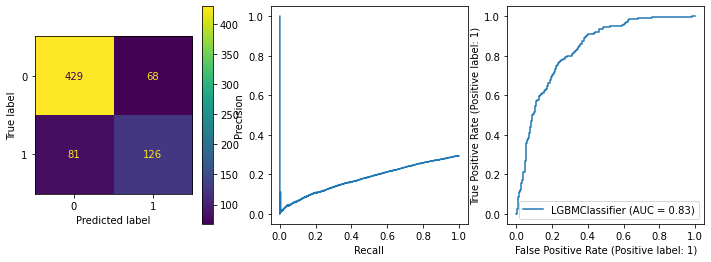

In [123]:
estimator = lgbm_depth.best_estimator_
test_estimator(estimator, X_test_scaled, y_test_scaled, "LGBM 14 depth")

In [56]:
%%time
SEARCH_PARAMS = {
                'learning_rate': np.linspace(0.001,0.4,10),
                'subsample':np.linspace(0.01,1.0, 20)
                }

FIXED_PARAMS={'objective': 'binary',
             'metric': 'roc_auc',
             "feature_fraction": 0.2,
             'is_unbalance':False,
             'max_depth': 14,
             'num_leaves': 50,
             'bagging_freq':5,
             'boosting':'dart',
             'early_stopping_rounds':30,
             'n_estimators':100,
             'verbosity': -100}

estimator = LGBMClassifier(**FIXED_PARAMS)
lgbm_tune = GridSearchCV(estimator, param_grid=SEARCH_PARAMS, cv=kFold, n_jobs=-1, scoring='roc_auc', verbose=1)
lgbm_tune.fit(X_train, y_train)
print(lgbm_tune.best_params_, lgbm_tune.best_score_)

CPU times: user 378 µs, sys: 102 µs, total: 480 µs
Wall time: 443 µs


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Data for LGBM Tunned
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       497
           1       0.61      0.57      0.59       207

    accuracy                           0.77       704
   macro avg       0.72      0.71      0.71       704
weighted avg       0.76      0.77      0.76       704



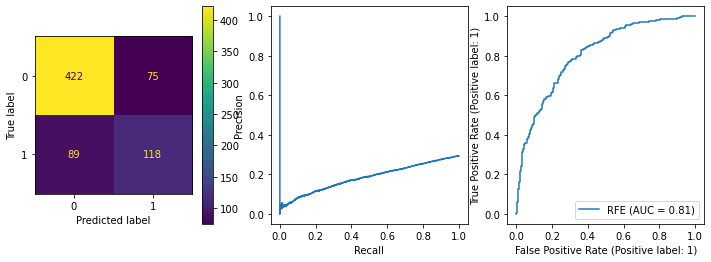

In [57]:
PARAMS_LGBM = {
     'objective': 'binary',
     'metric': 'roc_auc',
     'learning_rate': 0.17833333333333334,
     'subsample': 0.8436842105263158,
     "feature_fraction": 0.2,
     'max_depth': 14,
    'min_child_samples':20,
     'num_leaves': 50,
     'bagging_freq':5,
     'boosting':'dart',
     'n_estimators':1000,} 


estimator_lgbm = LGBMClassifier(**PARAMS_LGBM)
estimator_lgbm = RFE(estimator_lgbm, step=10)
estimator_lgbm.fit(X_train, y_train,early_stopping_rounds=40,eval_set=(X_test_scaled,y_test_scaled), eval_metric='roc_auc',  )
test_estimator(estimator_lgbm, X_test_scaled, y_test_scaled, "LGBM Tunned")

### Tunning RF

Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'max_features': 'log2'} 0.8498153326847625
Data for RF
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       497
           1       0.58      0.82      0.68       207

    accuracy                           0.77       704
   macro avg       0.74      0.78      0.75       704
weighted avg       0.81      0.77      0.78       704



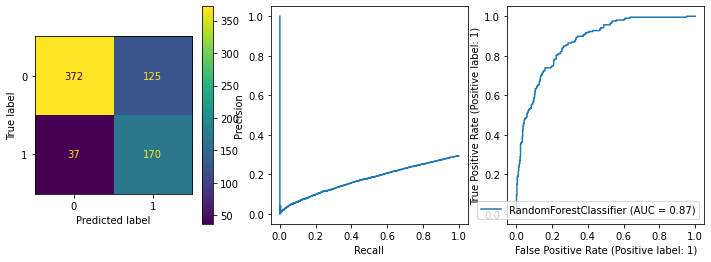

CPU times: user 1.17 s, sys: 114 ms, total: 1.28 s
Wall time: 2.28 s


In [141]:
%%time
SEARCH_PARAMS = {
                "max_features": ['auto', 'sqrt', 'log2']
                }

FIXED_PARAMS={'max_depth': 15, 'min_samples_leaf': 0.01, 'min_samples_split': 4 ,"n_jobs":-1, "n_estimators":50}
estimator = RandomForestClassifier(**FIXED_PARAMS)
rf_gr = GridSearchCV(estimator, param_grid=SEARCH_PARAMS, cv=5, n_jobs=-1, scoring='roc_auc', verbose=1)
rf_gr.fit(X_train, y_train)
print(rf_gr.best_params_, rf_gr.best_score_)
estimator = rf_gr.best_estimator_
test_estimator(estimator, X_test_scaled, y_test_scaled, "RF")

Data for RF Tunned
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       497
           1       0.59      0.83      0.69       207

    accuracy                           0.78       704
   macro avg       0.75      0.79      0.76       704
weighted avg       0.82      0.78      0.79       704



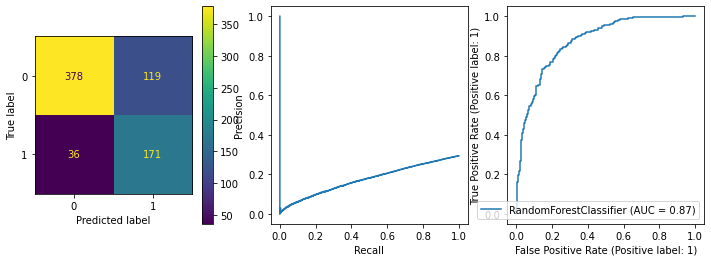

In [58]:
PARAMS_RF = {'max_depth': 15, 'min_samples_leaf': 0.01, 'min_samples_split': 4,'max_features': 'log2'}
estimator_rf = RandomForestClassifier(n_jobs=-1, n_estimators=1000, **PARAMS_RF)
estimator_rf.fit(X_train, y_train,)
test_estimator(estimator_rf, X_test_scaled, y_test_scaled, "RF Tunned")

Tunning Logistic regression

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'C': 31.575757575757574} 0.9157264152469574
Data for SVM
              precision    recall  f1-score   support

           0       0.94      0.68      0.79       497
           1       0.54      0.89      0.67       207

    accuracy                           0.75       704
   macro avg       0.74      0.79      0.73       704
weighted avg       0.82      0.75      0.76       704



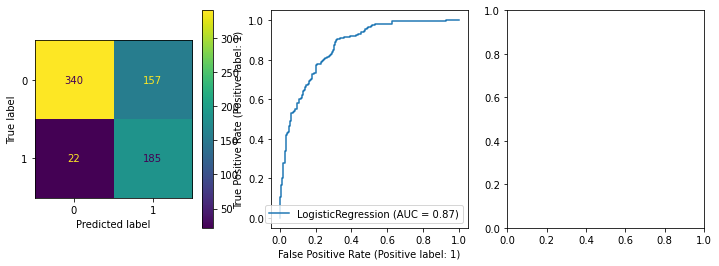

CPU times: user 4.59 s, sys: 2.81 s, total: 7.4 s
Wall time: 8.51 s


In [177]:
%%time
SEARCH_PARAMS_LR = {
                'C': np.linspace(25,32,100)
                }
estimator = LogisticRegression(class_weight={0:0.45, 1:0.55})
svm_lr = GridSearchCV(estimator, param_grid=SEARCH_PARAMS_LR, cv=5, n_jobs=-1, scoring='roc_auc', verbose=1)
svm_lr.fit(X_train, y_train)
print(svm_lr.best_params_, svm_gr.best_score_)
estimator = svm_lr.best_estimator_
test_estimator(estimator, X_test_scaled, y_test_scaled, "SVM", pr_curve=False)

Data for LR Tunned
              precision    recall  f1-score   support

           0       0.94      0.68      0.79       497
           1       0.54      0.89      0.67       207

    accuracy                           0.74       704
   macro avg       0.74      0.78      0.73       704
weighted avg       0.82      0.74      0.75       704



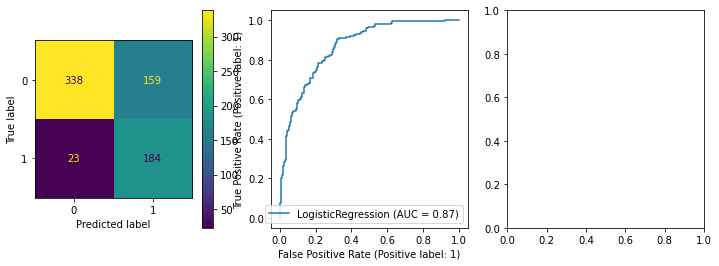

In [59]:
PARAMS_LR = {'C': 31.575757575757574, 'class_weight': {0:0.45, 1:0.55}, }
estimator_LR = LogisticRegression(**PARAMS_LR)
estimator_LR.fit(X_train, y_train,)
test_estimator(estimator_LR, X_test_scaled, y_test_scaled, "LR Tunned",pr_curve=False)

Voting final classifier

Data for Voting
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       497
           1       0.61      0.76      0.68       207

    accuracy                           0.79       704
   macro avg       0.75      0.78      0.76       704
weighted avg       0.81      0.79      0.79       704



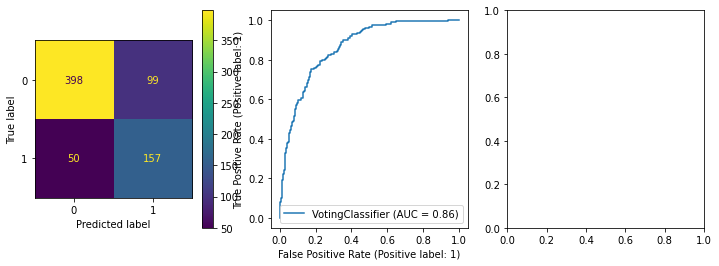

In [60]:
estimator_lgbm = LGBMClassifier(**PARAMS_LGBM)
estimator_lgbm = RFE(estimator_lgbm, step=10)
estimator_lr = LogisticRegression(**PARAMS_LR)
estimator_rf = RandomForestClassifier(n_jobs=-1, n_estimators=1000, **PARAMS_RF)

estimator = VotingClassifier(estimators=[('lr', estimator_lr),('lgbm', estimator_lgbm), ('rf', estimator_rf),], voting='soft', n_jobs=-1,)


estimator.fit(X_train, y_train)
test_estimator(estimator, X_test_scaled, y_test_scaled, "Voting", pr_curve=False)

In [65]:
pred = estimator.predict(X_test_scaled)
pred_proba = estimator.predict_proba(X_test_scaled)
res = pd.DataFrame(y_test_scaled)

In [68]:
res['predicted'] = pred
res['pred_proba'] = pred_proba[:,1]
res

,churn,predicted,pred_proba
5876,1,1,0.847613
622,0,0,0.419672
6928,0,0,0.146330
826,1,1,0.785397
1173,1,1,0.683336
...,...,...,...
2145,0,1,0.639617
5302,0,0,0.416242
7023,0,1,0.676224
5354,0,1,0.874844


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


Ways to improve the result:
- get more data

- get more data about churned customers

- more hyperparam tunning
